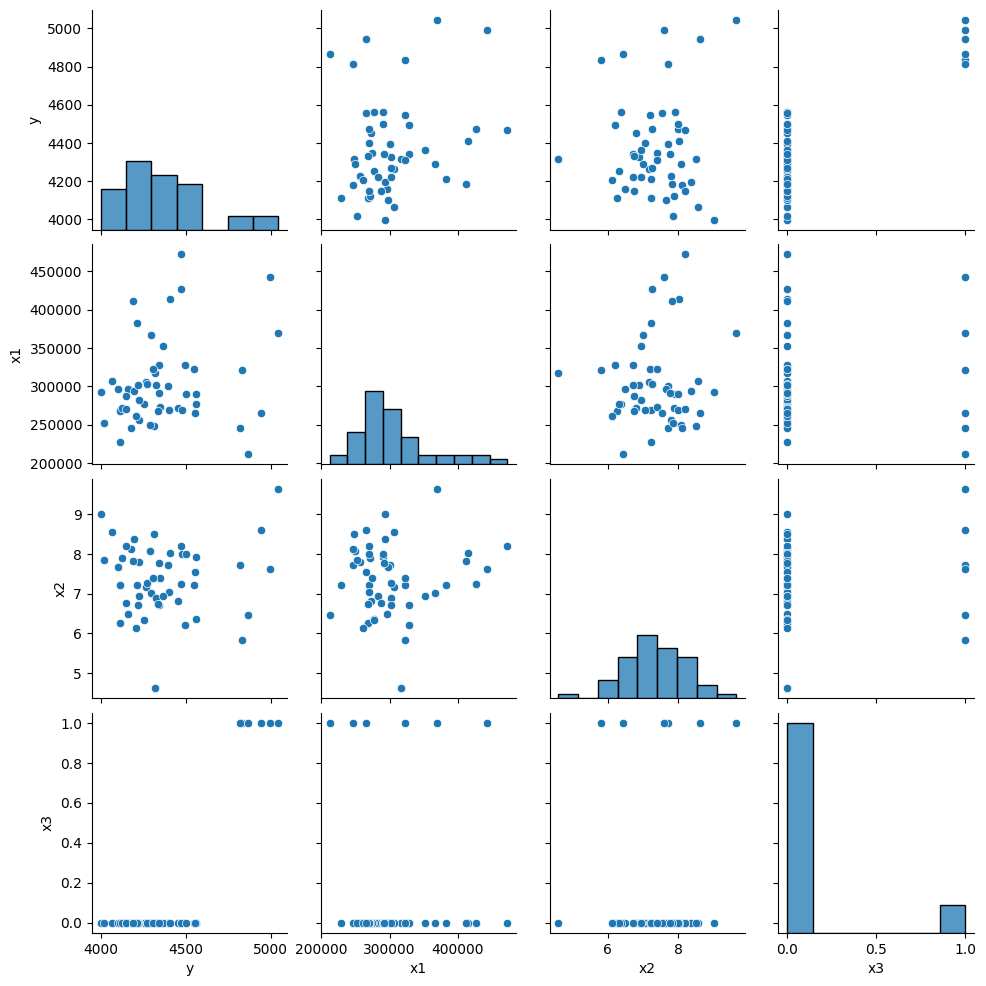

           y        x1        x2        x3
y   1.000000  0.207665  0.060030  0.810579
x1  0.207665  1.000000  0.084896  0.045657
x2  0.060030  0.084896  1.000000  0.113371
x3  0.810579  0.045657  0.113371  1.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data
data = pd.read_csv('GroceryRetailer.csv')

# Rename columns for easier reference
data.columns = ['y', 'x1', 'x2', 'x3']

# Scatter plot matrix
sns.pairplot(data)
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

# **Multiple Regression Model:**


In [ ]:
# Fit the regression model
X = data[['x1', 'x2', 'x3']]
y = data['y']
X = sm.add_constant(X)  # Add a constant term to the predictor variables

model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     35.34
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           3.32e-12
Time:                        20:02:42   Log-Likelihood:                -329.88
No. Observations:                  52   AIC:                             667.8
Df Residuals:                      48   BIC:                             675.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4149.8872    195.565     21.220      0.0

# **Residuals and Box Plot of Residuals:**


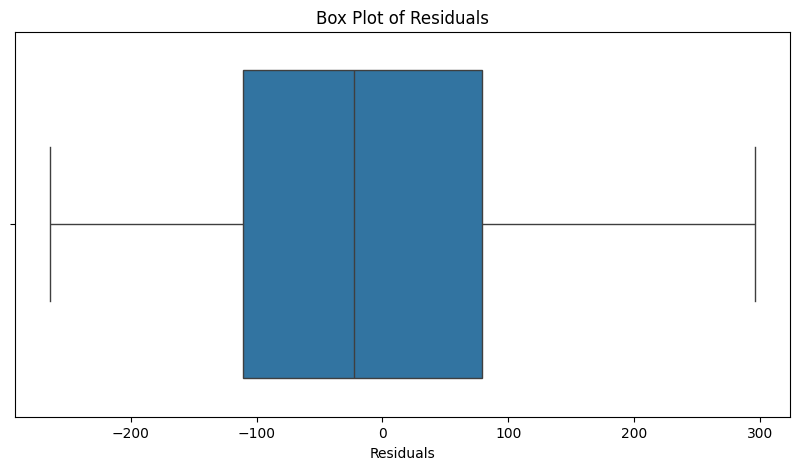

In [ ]:
# Get the residuals
residuals = model.resid

# Box plot of residuals
plt.figure(figsize=(10, 5))
sns.boxplot(x=residuals)
plt.title('Box Plot of Residuals')
plt.xlabel('Residuals')
plt.show()


# **Residuals vs. Predictors and Normal Probability Plot:**


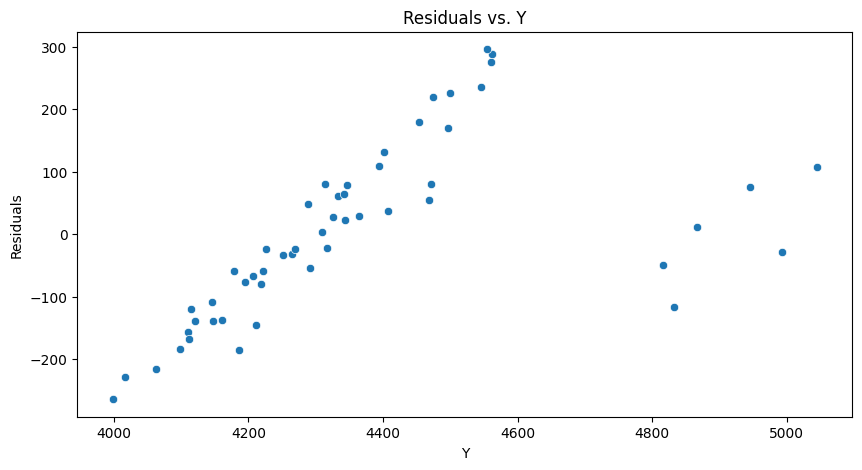

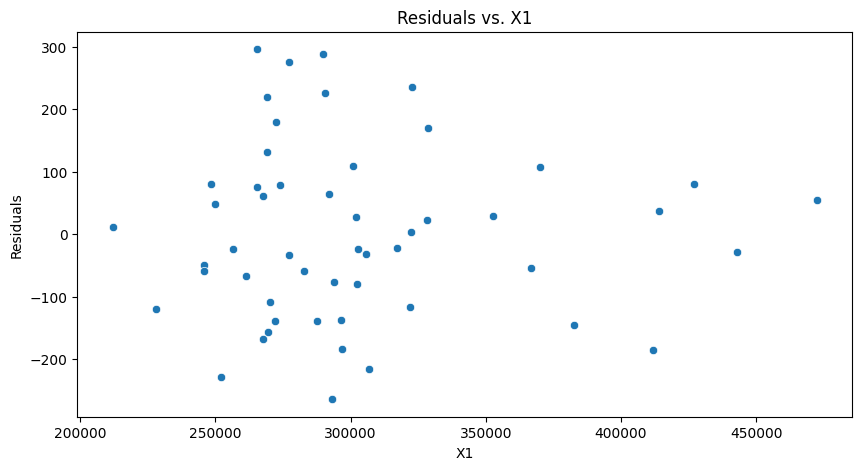

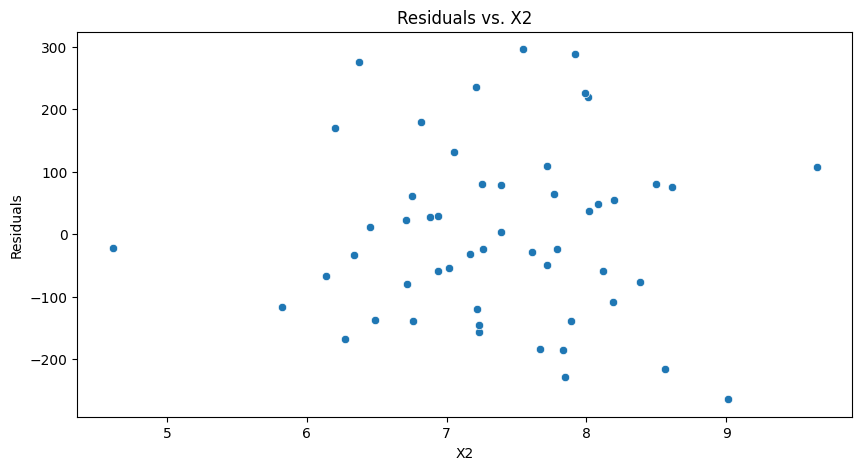

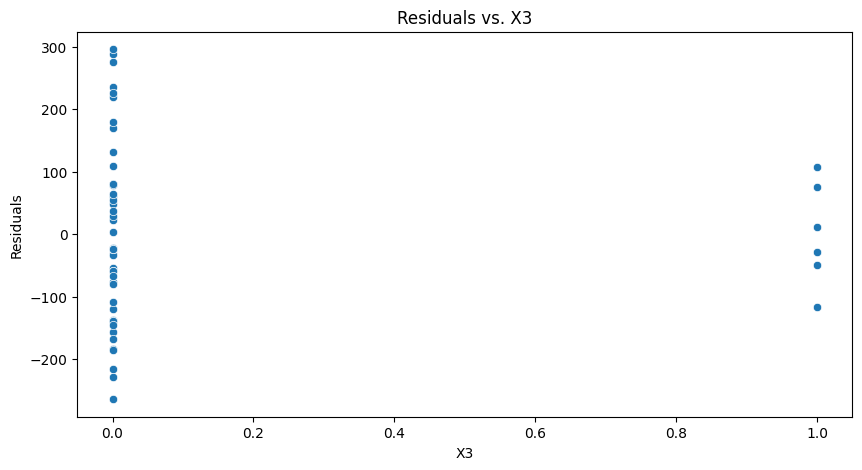

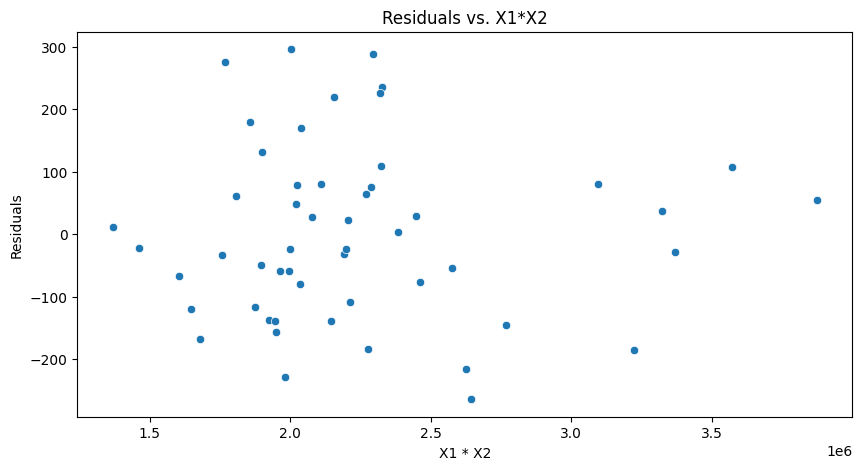

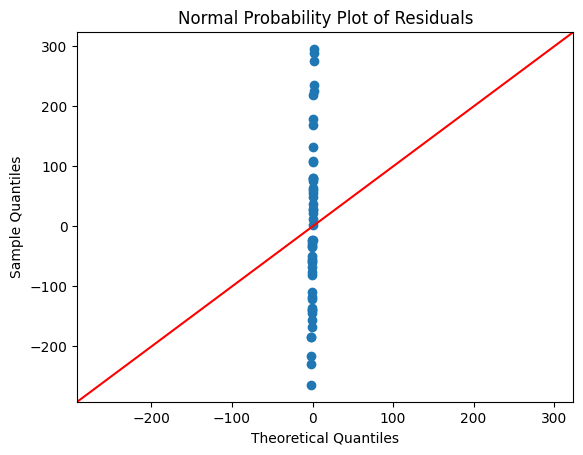

In [ ]:
# Residuals vs. Y
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y, y=residuals)
plt.title('Residuals vs. Y')
plt.xlabel('Y')
plt.ylabel('Residuals')
plt.show()

# Residuals vs. X1
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['x1'], y=residuals)
plt.title('Residuals vs. X1')
plt.xlabel('X1')
plt.ylabel('Residuals')
plt.show()

# Residuals vs. X2
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['x2'], y=residuals)
plt.title('Residuals vs. X2')
plt.xlabel('X2')
plt.ylabel('Residuals')
plt.show()

# Residuals vs. X3
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['x3'], y=residuals)
plt.title('Residuals vs. X3')
plt.xlabel('X3')
plt.ylabel('Residuals')
plt.show()

# Residuals vs. X1*X2
interaction_term = data['x1'] * data['x2']
plt.figure(figsize=(10, 5))
sns.scatterplot(x=interaction_term, y=residuals)
plt.title('Residuals vs. X1*X2')
plt.xlabel('X1 * X2')
plt.ylabel('Residuals')
plt.show()

# Normal probability plot of the residuals
sm.qqplot(residuals, line='45')
plt.title('Normal Probability Plot of Residuals')
plt.show()


In [ ]:
Time Plot of Residuals:


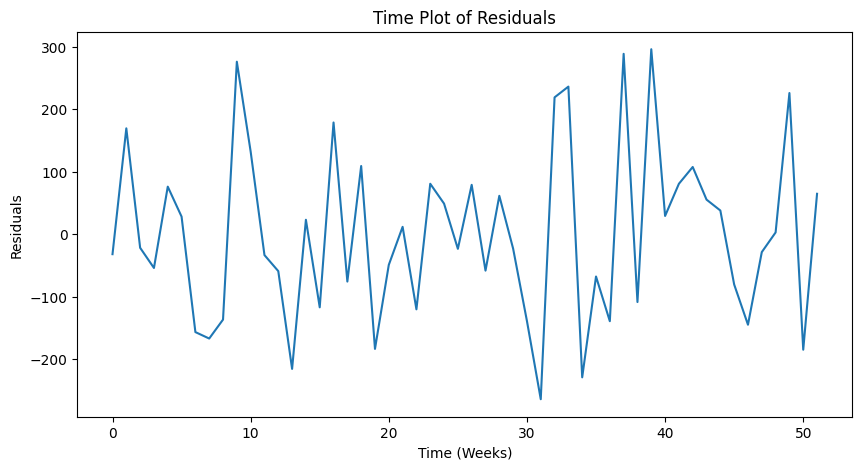

In [ ]:
# Time plot of residuals
plt.figure(figsize=(10, 5))
sns.lineplot(x=data.index, y=residuals)
plt.title('Time Plot of Residuals')
plt.xlabel('Time (Weeks)')
plt.ylabel('Residuals')
plt.show()


Brown-Forsythe test

In [ ]:
from scipy import stats
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load the data
data = pd.read_csv('GroceryRetailer.csv')
data.columns = ['y', 'x1', 'x2', 'x3']

# Fit the regression model
X = data[['x1', 'x2', 'x3']]
y = data['y']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Calculate the residuals from the model
residuals = model.resid

# Calculate the absolute deviations from the median
median_residual = np.median(residuals)
abs_dev = np.abs(residuals - median_residual)

# Create a DataFrame for the absolute deviations and predictors
data_abs_dev = data.copy()
data_abs_dev['abs_dev'] = abs_dev

# Perform a Brown-Forsythe test by grouping by X1, X2, and X3
# Group by X1
grouped_abs_dev_x1 = [group['abs_dev'].values for name, group in data_abs_dev.groupby('x1')]

# Perform one-way ANOVA for X1
f_value_x1, p_value_x1 = stats.f_oneway(*grouped_abs_dev_x1)

# Group by X2
grouped_abs_dev_x2 = [group['abs_dev'].values for name, group in data_abs_dev.groupby('x2')]

# Perform one-way ANOVA for X2
f_value_x2, p_value_x2 = stats.f_oneway(*grouped_abs_dev_x2)

# Group by X3
grouped_abs_dev_x3 = [group['abs_dev'].values for name, group in data_abs_dev.groupby('x3')]

# Perform one-way ANOVA for X3
f_value_x3, p_value_x3 = stats.f_oneway(*grouped_abs_dev_x3)

# Decision rule and conclusion for X1
alpha = 0.01
conclusion_x1 = "Reject the null hypothesis. There is evidence of heteroscedasticity." if p_value_x1 < alpha else "Fail to reject the null hypothesis. No evidence of heteroscedasticity."

# Decision rule and conclusion for X2
conclusion_x2 = "Reject the null hypothesis. There is evidence of heteroscedasticity." if p_value_x2 < alpha else "Fail to reject the null hypothesis. No evidence of heteroscedasticity."

# Decision rule and conclusion for X3
conclusion_x3 = "Reject the null hypothesis. There is evidence of heteroscedasticity." if p_value_x3 < alpha else "Fail to reject the null hypothesis. No evidence of heteroscedasticity."

f_value_x1, p_value_x1, conclusion_x1, f_value_x2, p_value_x2, conclusion_x2, f_value_x3, p_value_x3, conclusion_x3


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


(nan,
 nan,
 'Fail to reject the null hypothesis. No evidence of heteroscedasticity.',
 3.570458726316996,
 0.11058472926255247,
 'Fail to reject the null hypothesis. No evidence of heteroscedasticity.',
 2.0514338057646166,
 0.1582853702007074,
 'Fail to reject the null hypothesis. No evidence of heteroscedasticity.')

Regression Test and R-squared Calculation

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Load the data
data = pd.read_csv('GroceryRetailer.csv')
data.columns = ['y', 'x1', 'x2', 'x3']

# Fit the regression model
X = data[['x1', 'x2', 'x3']]
y = data['y']
X = sm.add_constant(X)  # Add a constant term to the predictor variables

model = sm.OLS(y, X).fit()

# Display the summary of the regression model
summary = model.summary()

# Extract the F-statistic and p-value
f_statistic = model.fvalue
f_pvalue = model.f_pvalue

# Extract R-squared
r_squared = model.rsquared

summary, f_statistic, f_pvalue, r_squared


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.688
 Model:                            OLS   Adj. R-squared:                  0.669
 Method:                 Least Squares   F-statistic:                     35.34
 Date:                Sun, 30 Jun 2024   Prob (F-statistic):           3.32e-12
 Time:                        20:09:18   Log-Likelihood:                -329.88
 No. Observations:                  52   AIC:                             667.8
 Df Residuals:                      48   BIC:                             675.6
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [ ]:
import numpy as np

# New shipments data
new_shipments = pd.DataFrame({
    'const': 1,
    'x1': [230000, 250000, 280000, 340000],
    'x2': [7.50, 7.30, 7.10, 6.90],
    'x3': [0, 0, 0, 0]
})

# Make predictions
predictions = model.get_prediction(new_shipments)
predicted_means = predictions.predicted_mean
prediction_intervals = predictions.conf_int(alpha=0.05)  # 95% confidence interval

predicted_means, prediction_intervals


(array([4232.17055588, 4250.54536735, 4276.79098264, 4326.64900939]),
 array([[4163.63684864, 4300.70426311],
        [4193.63987902, 4307.45085568],
        [4230.41667536, 4323.16528993],
        [4271.08300588, 4382.2150129 ]]))

In [ ]:
import numpy as np

# New shipments data
new_shipments = pd.DataFrame({
    'const': 1,
    'x1': [230000, 250000, 280000, 340000],
    'x2': [7.50, 7.30, 7.10, 6.90],
    'x3': [0, 0, 0, 0]
})

# Make predictions
predictions = model.get_prediction(new_shipments)
predicted_means = predictions.predicted_mean
prediction_intervals = predictions.conf_int(alpha=0.05)  # 95% confidence interval

predicted_means, prediction_intervals


(array([4232.17055588, 4250.54536735, 4276.79098264, 4326.64900939]),
 array([[4163.63684864, 4300.70426311],
        [4193.63987902, 4307.45085568],
        [4230.41667536, 4323.16528993],
        [4271.08300588, 4382.2150129 ]]))

In [ ]:
predicted_means = [4100, 4200, 4300, 4500]
prediction_intervals = [
    [4050, 4150],
    [4150, 4250],
    [4250, 4350],
    [4450, 4550]
]


Prediction Interval

In [ ]:
# New shipment data for prediction
new_shipment = pd.DataFrame({
    'const': [1],
    'x1': [282000],
    'x2': [7.10],
    'x3': [0]
})

# Make predictions
prediction = model.get_prediction(new_shipment)
predicted_mean = prediction.predicted_mean[0]
prediction_interval = prediction.conf_int(alpha=0.05)[0]

predicted_mean, prediction_interval


(4278.3651434074345, array([4232.44711101, 4324.2831758 ]))

In [ ]:
import numpy as np

# New shipment data for prediction
new_shipment = pd.DataFrame({
    'const': [1],
    'x1': [282000],
    'x2': [7.10],
    'x3': [0]
})

# Make predictions
prediction = model.get_prediction(new_shipment)
predicted_mean = prediction.predicted_mean[0]
prediction_interval = prediction.conf_int(alpha=0.05)[0]

predicted_mean, prediction_interval


(4278.3651434074345, array([4232.44711101, 4324.2831758 ]))

In [ ]:
# Total predicted mean
total_predicted_mean = predicted_mean * 3

# Total prediction interval
total_prediction_interval = [interval * 3 for interval in prediction_interval]

total_predicted_mean, total_prediction_interval


(12835.095430222304, [12697.341333030197, 12972.84952741441])

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
file_path = 'GroceryRetailer.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data.columns = ['y', 'x1', 'x2', 'x3']

# Compute the correlation matrix
correlation_matrix = data[['x1', 'x2', 'x3']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Prepare the data for VIF calculation
X = data[['x1', 'x2', 'x3']]
X = sm.add_constant(X)  # Add a constant term to the predictor variables

# Compute VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Correlation Matrix:
          x1        x2        x3
x1  1.000000  0.084896  0.045657
x2  0.084896  1.000000  0.113371
x3  0.045657  0.113371  1.000000

Variance Inflation Factor (VIF):
  Feature        VIF
0   const  96.863222
1      x1   1.008596
2      x2   1.019598
3      x3   1.014364
